In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Which of $k$ chip brands sold at a convenience store are "the best"?

Let $\mathbf x^{(t)}$ be a length $k$ vector counting the number of each kind of chip brand purchased by time $t$ (relative to some start time) on a given day. Assume $\mathbf x$ follows the ***multinomial distribution*** (with $t$ omitted for brevity)

$$p(\mathbf x | \mathbf p) = {\displaystyle {\frac {n!}{x_{1}!\cdots x_{k}!}}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}}$$

> A ***multinomial distribution*** generalizes the ***binary outcome*** of the ***binomial distribution*** to a ***categorical outcome***. So, a ***multinomial random variable*** also consists of $n$ "trials", but now there are $k$ possible outcomes as opposed to two ("success" or "failure"), and the observed nubmer of each of these outcomes (out of $n$ "trials") are recorded in $\mathbf x$.
> - The ***multinomial distribution*** is parameterized by a "probability vector" $\mathbf p$ of length $k$ which satisfies $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$) and where $p_j$ specifies the probabilities of the $j^{th}$ outcome of the $k$ categorical outcomes modeled by the ***multinomial distribution***.

The ***Dirichlet distribution*** has the form (again omitting $t$ for brevity)

$$f(\mathbf p | \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^k p_j^{\alpha_j - 1} \quad E[p_j] = \frac{\alpha_j}{\sum_{j=1}^k \alpha_j} \quad \text{Var} [p_j]=\frac {E[p_j](1-E[p_j])}{1 + \sum_{j=1}^k \alpha_j} \quad \text{Cov}_{j\neq i}[p_j,p_i]=-\frac {E[p_j]E[p_i]}{1 + \sum_{j=1}^k \alpha_j}$$

and models a probability vector over a ***simplex***, meaning that $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$).

> A ***Dirichlet distribution*** generalizes a ***beta distribution*** which models a "probability-valued" ***random variable*** which takes on values between $0$ and $1$. So, a ***Dirichlet random variable*** $\mathbf p$ is a vector of $k$ "probabilities" which sum to $1$.
> - The ***Dirichlet distribution*** is parameterized by the length $k$ vector $\boldsymbol\alpha$ where $\alpha_j>0$ for all $j$. As indicated by the expectation, variance, and covariance formulas above, the $\boldsymbol\alpha$ parameter vector controls the behavior of the actualizations of a ***Dirichlet random variable*** $\mathbf p$.  

In [3]:
# Example draw for n=10 from a Multinomial distribution
stats.multinomial(p=[0.2,0.5,0.2,0.1], n=10).rvs(size=1)[0]
# You can re-run the cell a few times to see example actualizations
# of this multinomial random variable, and note it's relationship to `n`

array([3, 5, 2, 0])

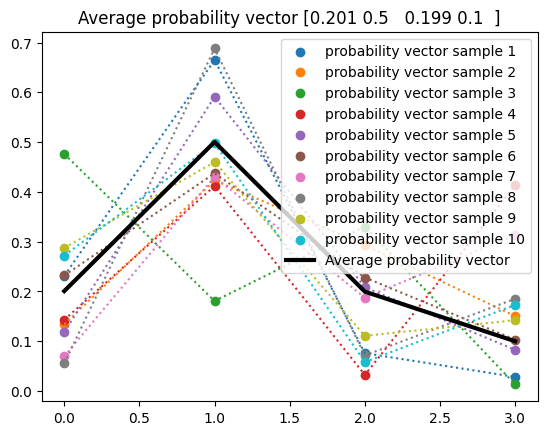

In [5]:
# Example draws from a Dirichlet distribution
plt.figure()
for i in range(10):
    p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0]; plt.plot(p, ':')
    plt.scatter(x=[0,1,2,3], y=p, label="probability vector sample "+str(i+1))

p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000).mean(axis=0)
plt.plot(p, 'k', linewidth=3, label="Average probability vector");
plt.title("Average probability vector "+str(p.round(3))); plt.legend();

1. [1/2 points] Using the "chips example", describe how the sequence $\mathbf x^{(t)}$ would generally behave over time $t$ assuing time $t=0$ is when the convenience store begins counting chip purchases.

Initially at t = 0 the sequence would generally exhibits randomness and fluctuation, reflecting the variability inherent in early data process. It would be extremeley sparse

Then the $x^{(t)}$ would eventually increase very large numbers the proportion from each should converge to the actual parameter of the best chip brand after seeing enough samples.


2. [1/2 points] Specify the distribution $p(\mathbf p | \mathbf x^{(t)})$, your
belief about the "best chips" at time $t$ according to a Bayesian analysis.


The distribution of p(p| $x^{(t)}$) is a Dirichlet distribution and the paramaters of the distribution is α where
$$\alpha = [\alpha_1 + x_1, ...., \alpha_t + x_t]$$

and t is the number of samples


3. [1/2 point] Provide code which samples from $p(p_j|\mathbf x^{(t)}=[2,5,2,1])$ which is one of the marginal distributions of $p(\mathbf p | \mathbf x^{(t)}=[2,5,2,1])$.

- Hint 1: You do not have to analytically derive $p(p_j|\mathbf x^{(t)})$. You can sample from it just based on sampling from $p(\mathbf p | \mathbf x^{(t)})$.
- Hint 1: The $\alpha_j$ of the previous question now actually require chosen values. Use $1$ for each.

In [11]:
j=1

observed  = np.array([2, 5,2 ,1])

alpha_v = observed + 1



post_samp = stats.dirichlet(alpha=alpha_v).rvs()[0, j]

post_samp



0.325783230945874

4. [1/2 point] Provide code which estimates $\Pr(p_j>q|\mathbf x^{(t)}=[2,5,2,1])$ for some $q$ between $0$ and $1$.

In [121]:
q = 0.25
j = 1
observed = np.array([2, 5, 2, 1])

alpha_v = observed + 1

(stats.dirichlet(alpha=alpha_v).rvs(size=100000)[:,j] > q).mean()



0.92144

5. [1/2 point] Provide an interval quantifying your posterior uncertainty about the value of $p_j|\mathbf x^{(t)}=[2,5,2,1]$.


In [122]:
np.quantile(stats.dirichlet(alpha=alpha_v).rvs(size=100000)[:, j], [0.025, .975])


array([0.19115902, 0.68332354])

6. [1/2 point] Provide code which estimates $\Pr(p_j>p_{j'}|\mathbf x^{(t)}=[2,5,2,1])$ for $j\neq j'$.

In [133]:
j = 1
j_next = 2

observed = np.array([2, 5, 2, 1])
alpha_v = observed + 1
samp = stats.dirichlet(alpha=alpha_v).rvs(size=100000)

j_samp = samp[:, j]
j_next_samp = samp[:, j_next]

proportion = (j_samp > j_next_samp).mean()

print("Proportion of samples where p_j > p_j_next:", proportion)


Proportion of samples where p_j > p_j_next: 0.85674


7. [1/2 points] Provide python code to sample from the distribution of $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $\frac{p_j}{p_{j'}}$.


In [136]:
j = 0
j_next = 2

observed = np.array([2, 5, 2, 1])
alpha_v = observed + 1
samp = stats.dirichlet(alpha=alpha_v).rvs(size=100000)

j_samp = samp[:, j]
j_next_samp = samp[:, j_next]

ratio_samp = (j_samp / j_next_samp)

print(np.quantile(ratio_samp, [0.025, 0.975]));


[0.17155856 5.82805039]


8. [1/2 points] Provide python code to sample from the distribution of $p\left(p_j - p_{j'} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $p_j - p_{j'}$.

In [139]:
j = 1
j_next = 2

observed = np.array([2, 5, 2, 1])
alpha_v = observed + 1
samp = stats.dirichlet(alpha=alpha_v).rvs(size=100000)

j_samp = samp[:, j]
j_next_samp = samp[:, j_next]

diff_samp = (j_samp - j_next_samp)

print(np.quantile(diff_samp, [0.025, 0.975]));


[-0.19396759  0.58561164]


9. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ why are both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$? and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ relevant? What's different between these for $(j,j')=(2,3)$ as opposed to $(j,j')=(4,5)$?


Ratio differences are focused on the relative proportion between values in the differences whereas the difference looks at the absolute difference between the values.

The difference may be 0.0001 which does not holistacally portray whats going on as the ratio does not tell you the MAGNITUDE of the probabilities compared to the absolute difference.



10. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ what should be true about $t$ if we are examining
$p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$?

Hint: refer back to problem 1.


t needs to be a large number as the probailities of the chip brands are low. Thus T must be large to view counts of them in a reasonable fashion.
If T not large it may end up as a count = 0